# Exercise 8 Chapter 3

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
import pandas as pd
import numpy as np

# Feldman-Cousins Interval

## Create Table

In [2]:
def Poiss_table_FC(N,l,u):
    pmf = np.array([round(poisson.pmf(n,u),4) for n in range(N)])
    u_best = np.array([np.maximum(n,l) for n in range(N)])
    pmf_best = np.array([round(poisson.pmf(n,u_best[n]),4) for n in range(N)])
    r = np.round(pmf / pmf_best,3)
    i = np.argsort(r)[::-1]
    rank = np.array([np.where(i == x)[0][0]+1 for x in range(N)])
    F_r = pmf[np.argsort(rank)].cumsum()[rank-1]
    data = {'P(n|u)':pmf, 'u_best':u_best, 'P(n|u_best)':pmf_best, 'r':r, 'Rank':rank, 'F_r(n|u)':F_r }
    df = pd.DataFrame(data)
    return df    

## FC Interval

In [3]:
def FC(df,alpha):
    srtd = df['F_r(n|u)'].reindex(np.argsort(df['Rank']))
    upper = np.min(srtd[srtd>=alpha])
    array = np.argwhere(srtd == upper)
    sml = srtd[:array[0][0]+1]
    return sml.index.to_numpy()

## Bandplot

In [4]:
intervals_FC = []
for uu in np.arange(3.2,15, 0.1):
    df_FC = Poiss_table_FC(N=25, l=3.2, u=uu)
    FC_int = FC(df_FC,0.68)
    intervals_FC.append((np.min(FC_int),np.max(FC_int)))
intervals_FC = np.array(intervals_FC)

/Users/jlrestrepol/opt/miniconda3/envs/data-analysis/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


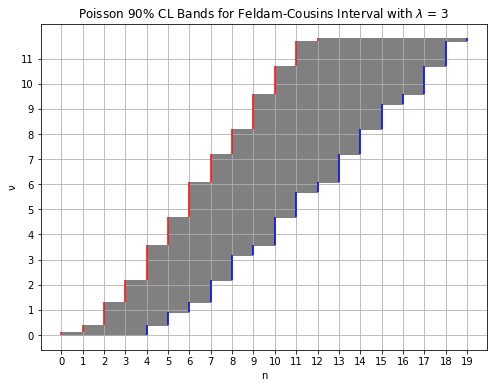

In [6]:
plt.figure(figsize=[8.0,6.0])
plt.xticks(ticks = np.arange(len(df_FC)))
plt.yticks(ticks = np.arange(len(intervals_FC)+1, step = 10), labels=np.arange(int(len(intervals_FC)/10+1)))
plt.ylabel('\u03BD')
plt.xlabel('n')
plt.grid()
plt.title(r'Poisson 90% CL Bands for Feldam-Cousins Interval with $\lambda$ = 3')

plt.vlines(x = intervals_FC[:,0], ymin = np.arange(len(intervals_FC)), ymax = np.arange(1,len(intervals_FC)+1), 
           colors='red')
plt.vlines(x = intervals_FC[:,1], ymin = np.arange(len(intervals_FC)), ymax = np.arange(1,len(intervals_FC)+1), 
           colors='blue')
a=0
for e in intervals_FC:
    plt.fill_betweenx(y=np.array([a,a+1]), x1 = np.array([e[0],e[0]]), x2 = np.array(e[1],e[1]), color = 'gray')
    a+=1

# Smallest Interval

## Create Table

In [7]:
def Poiss_table(N,u):
    pmf = np.array([round(poisson.pmf(n,u),4) for n in range(N)])
    cdf = np.array([round(poisson.cdf(n,u),4) for n in range(N)])
    i = np.argsort(pmf)[::-1]
    r = np.array([np.where(i == x)[0][0]+1 for x in range(N)])
    F_r = pmf[np.argsort(r)].cumsum()[r-1]
    data = {'P(n|u)':pmf, 'F(n|u)':cdf, 'R':r, 'F_r(n|u)':F_r }
    df = pd.DataFrame(data)
    return df    

## Smallest Interval

In [8]:
def smallest(df,alpha):
    srtd = df['F_r(n|u)'].reindex(np.argsort(df['R']))
    upper = np.min(srtd[srtd>=alpha])
    array = np.argwhere(srtd == upper)
    sml = srtd[:array[0][0]+1]
    return sml.index.to_numpy()

In [12]:
intervals_sm = []
for uu in np.arange(3.1,15, 0.1):
    df = Poiss_table(N=24,u=uu)
    sml = smallest(df,0.68)
    intervals_sm.append((np.min(sml),np.max(sml)))
intervals_sm = np.array(intervals_sm)

## Bandplot

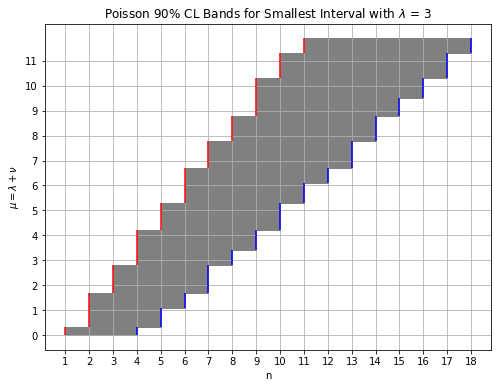

In [13]:
plt.figure(figsize=[8.0,6.0])
plt.xticks(ticks = np.arange(len(df)))
plt.yticks(ticks = np.arange(len(intervals_sm)+1, step = 10), labels=np.arange(int(len(intervals_sm)/10+1)))
plt.ylabel(r'$\mu = \lambda + \nu$')
plt.xlabel('n')
plt.grid()
plt.title(r'Poisson 90% CL Bands for Smallest Interval with $\lambda$ = 3 ')

plt.vlines(x = intervals_sm[:,0], ymin = np.arange(len(intervals_sm)), ymax = np.arange(1,len(intervals_sm)+1), 
           colors='red')
plt.vlines(x = intervals_sm[:,1], ymin = np.arange(len(intervals_sm)), ymax = np.arange(1,len(intervals_sm)+1), 
           colors='blue')
a=0
for e in intervals_sm:
    plt.fill_betweenx(y=np.array([a,a+1]), x1 = np.array([e[0],e[0]]), x2 = np.array(e[1],e[1]), color = 'gray')
    a+=1

# Credible Interval

In [14]:
import numpy as np

In [15]:
def Post(nu,n,l):
    num = np.math.exp(-nu)*(l+nu)**n
    den = np.math.factorial(n)*np.sum([l**i/np.math.factorial(i) for i in range(n+1)])
    return num/den

In [16]:
def F_post(nu,n,l):
    num = np.math.exp(-nu)*np.sum([(l+nu)**i/np.math.factorial(i) for i in range(n+1)])
    den = np.sum([l**i/np.math.factorial(i) for i in range(n+1)])
    return 1-num/den

In [25]:
def my_fun(z):
    nu1 = z[0]
    nu2 = z[1]

    f = np.zeros(2)
    f[0] = F_post(nu2,n=nn,l=3.2) - F_post(nu1,n=nn,l=3) - 0.68
    f[1] = Post(nu2,n=nn,l=3.2) - Post(nu1,n=nn,l=3)
    return np.dot(f,f)

In [26]:
def my_cons(z):
    nu1 = z[0]
    nu2 = z[1]
    f = np.zeros(2)
    f[0] = nu1
    f[1] = nu2
    return f

In [27]:
from scipy.optimize import minimize

In [28]:
cons = {'type' : 'ineq', 'fun': my_cons}

In [76]:
intervals = []
for nn in range(10):
    intervals.append(minimize(my_fun, (1, 0), method='SLSQP', constraints=cons, tol=1e-10).x)

In [77]:
intervals = np.array(intervals)

In [82]:
intervals[0] = [-9.90564341e-16, 4.61818463e-01]
intervals[-1] = [ 3.19902534e+00,  9.16536705e+00]

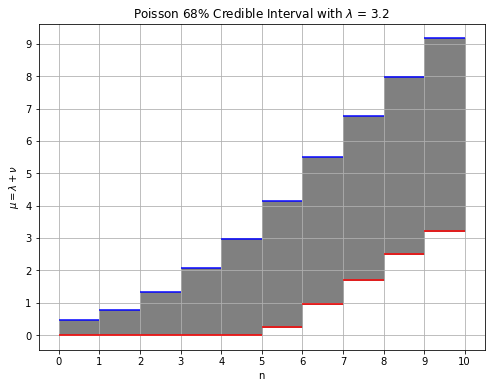

In [83]:
plt.figure(figsize=[8.0,6.0])
plt.xticks(ticks = np.arange(11))
plt.yticks(ticks = np.arange(len(intervals)), labels=np.arange(int(len(intervals))+4))
plt.ylabel(r'$\mu = \lambda + \nu$')
plt.xlabel('n')
plt.grid()
plt.title(r'Poisson 68% Credible Interval with $\lambda$ = 3.2 ')

plt.hlines(y = intervals[:,0], xmin = np.arange(len(intervals)), xmax = np.arange(1,len(intervals)+1), colors='red')
plt.hlines(y = intervals[:,1], xmin = np.arange(len(intervals)), xmax = np.arange(1,len(intervals)+1), colors='blue')
a=0
for e in intervals:
    plt.fill_betweenx(y=np.array([e[0],e[1]]), x1 = np.array([a,a]), x2 = np.array([a+1,a+1]), color = 'gray')
    a+=1

# Integrated plot

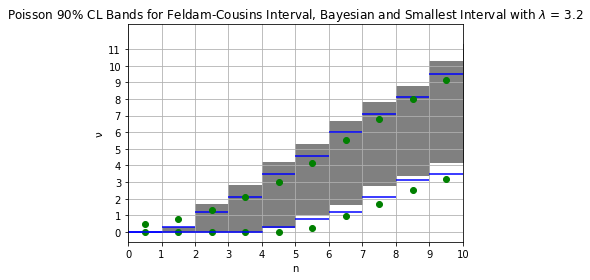

In [90]:
plt.xticks(ticks = np.arange(len(df_FC)*10+1, step = 1), labels=np.arange(int(len(df_FC)*10+1)))
plt.yticks(ticks = np.arange(len(intervals_FC)+1, step = 10), labels=np.arange(int(len(intervals_FC)/10+1)))
plt.xlim(None,10)
plt.ylabel('\u03BD')
plt.xlabel('n')
plt.grid()
plt.title(r'Poisson 90% CL Bands for Feldam-Cousins Interval, Bayesian and Smallest Interval with $\lambda$ = 3.2')

plt.hlines(y = np.arange(len(intervals_FC)-1), xmin = intervals_FC[:,0], xmax = intervals_FC[1:,0], 
           colors='blue')
plt.hlines(y = np.arange(len(intervals_FC)-1), xmin = intervals_FC[:,1], xmax = intervals_FC[1:,1], 
           colors='blue')

plt.plot(np.arange(len(intervals))+0.5,intervals[:,0]*10,'go')
plt.plot(np.arange(len(intervals))+0.5,intervals[:,1]*10,'go')
plt.plot(np.arange(0,5),np.zeros(5),'b-')


a=0
for e in intervals_sm:
    plt.fill_betweenx(y=np.array([a,a+1]), x1 = np.array([e[0],e[0]]), x2 = np.array(e[1],e[1]), color = 'gray')
    a+=1


## Table

In [23]:
intervals_tuple = [i for i in map(tuple, np.round(intervals, decimals = 3))]
intervals_FC_tuple = np.unique([i for i in map(tuple, np.round(intervals_FC, decimals = 3))], axis = 0).tolist()
intervals_sm_tuple = np.unique([i for i in map(tuple, np.round(intervals_sm, decimals = 3))], axis = 0).tolist()

In [24]:
intervals_dict = {'Bayesian':intervals_tuple,
                  'Feldman-Cousins':intervals_FC_tuple,
                  'Smallest':intervals_sm_tuple}

In [25]:
df_intervals = pd.DataFrame(data = {'Bayesian':intervals_tuple,
                  'Feldman-Cousins':intervals_FC_tuple[:len(intervals_tuple)],
                    'Smallest':intervals_sm_tuple[:len(intervals_tuple)]})

In [90]:
df_intervals.to_latex()

'\\begin{tabular}{llll}\n\\toprule\n{} &        Bayesian & Feldman-Cousins & Smallest \\\\\n\\midrule\n0 &      (0.0, 0.4) &          [0, 4] &   [1, 4] \\\\\n1 &    (0.0, 0.772) &          [1, 4] &   [2, 5] \\\\\n2 &    (0.0, 1.354) &          [2, 5] &   [2, 6] \\\\\n3 &    (0.0, 2.144) &          [2, 6] &   [3, 7] \\\\\n4 &   (-0.0, 3.085) &          [3, 7] &   [4, 8] \\\\\n5 &  (0.251, 4.286) &          [4, 8] &   [4, 9] \\\\\n6 &  (0.942, 5.674) &          [4, 9] &  [5, 10] \\\\\n7 &  (1.697, 6.954) &         [5, 10] &  [6, 11] \\\\\n8 &  (2.496, 8.169) &         [6, 11] &  [6, 12] \\\\\n9 &   (3.319, 9.35) &         [6, 12] &  [7, 13] \\\\\n\\bottomrule\n\\end{tabular}\n'

## Reproduction of Figure 3.7

In [21]:
intervals_FC = np.array([[ 0,  5],[ 0,  6],[ 0,  6],[ 0,  6],[ 0,  6],[ 0,  6],[ 0,  6],[ 0,  6],[ 0,  7],[ 1,  7],[ 1,  7],[ 1,  7],[ 1,  7],[ 1,  7],[ 1,  7],[ 1,  8],[ 1,  8],[ 1,  8],[ 2,  9],[ 2,  9],[ 2,  9],[ 2,  9],[ 2,  9],[ 2,  9],[ 2,  9],[ 2,  9],[ 2, 10],[ 2, 10],[ 2, 10],[ 2, 10],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 12],[ 3, 12],[ 3, 12],[ 3, 12],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 5, 14],[ 5, 14],[ 5, 14],[ 5, 14],[ 5, 14],[ 5, 14],[ 5, 14],[ 5, 14],[ 5, 14],[ 5, 15],[ 5, 15],[ 5, 15],[ 5, 15],[ 5, 15],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 17],[ 6, 17],[ 6, 17],[ 6, 17],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 8, 19],[ 8, 19],[ 8, 19],[ 8, 19],[ 8, 19],[ 8, 19],[ 8, 19],[ 8, 19],[ 8, 19],[ 8, 19],[ 8, 20],[ 8, 20],[ 8, 20],[ 8, 20],[ 9, 21],[ 9, 21],[ 9, 21],[ 9, 21],[ 9, 21],[ 9, 21],[ 9, 21],[ 9, 21],[ 9, 21],[ 9, 21]])

intervals = np.array([[ 1.28756334e-15,  2.40034487e+00],[-1.03731375e-15,  2.85796535e+00],[-1.68291359e-17,  3.69734183e+00],[ 1.45294930e-17,  4.23560981e+00],[ 2.93483280e-17,  5.34981235e+00],[ 5.65690496e-18,  6.08461582e+00],[ 5.00000000e-01,  8.08956577e+00],[ 1.05046792e+00,  9.67878004e+00],[ 1.70138538e+00,  1.10966543e+01]])

intervals_sm = np.array([[ 1,  6],[ 1,  6],[ 1,  6],[ 1,  6],[ 1,  6],[ 1,  7],[ 1,  7],[ 1,  7],[ 1,  7],[ 1,  7],[ 1,  7],[ 1,  7],[ 1,  7],[ 1,  7],[ 1,  7],[ 1,  8],[ 1,  8],[ 1,  8],[ 1,  8],[ 2,  9],[ 2,  9],[ 2,  9],[ 2,  9],[ 2,  9],[ 2,  9],[ 2,  9],[ 2,  9],[ 2,  9],[ 2,  9],[ 2, 10],[ 2, 10],[ 2, 10],[ 2, 10],[ 2, 10],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 11],[ 3, 12],[ 3, 12],[ 3, 12],[ 3, 12],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 4, 13],[ 5, 14],[ 5, 14],[ 5, 14],[ 5, 14],[ 5, 15],[ 5, 15],[ 5, 15],[ 5, 15],[ 5, 15],[ 5, 15],[ 5, 15],[ 5, 15],[ 5, 15],[ 5, 15],[ 5, 15],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 16],[ 6, 17],[ 6, 17],[ 6, 17],[ 6, 17],[ 6, 17],[ 6, 17],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 7, 18],[ 8, 19],[ 8, 19],[ 8, 19],[ 8, 19],[ 8, 19],[ 8, 20],[ 8, 20],[ 8, 20],[ 8, 20],[ 8, 20],[ 8, 20],[ 8, 20],[ 8, 20],[ 8, 20],[ 8, 20],[ 9, 21],[ 9, 21],[ 9, 21],[ 9, 21]])

"\na=0\nfor e in intervals_sm:\n    plt.fill_betweenx(y=np.array([a,a+1]), x1 = np.array([e[0],e[0]]), x2 = np.array(e[1],e[1]), color = 'gray')\n    a+=1\n    "

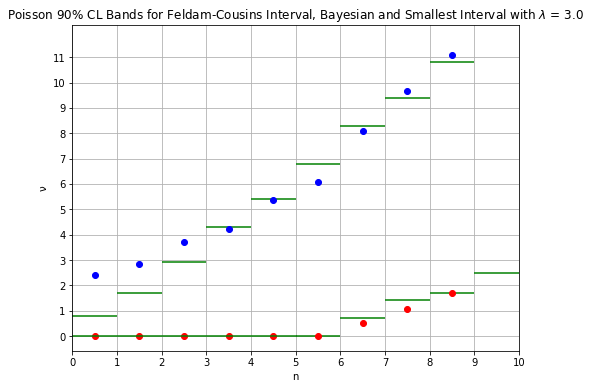

In [29]:
plt.figure(figsize=[8.0,6.0])
plt.xticks(ticks = np.arange(len(df_FC)*10+1, step = 1), labels=np.arange(int(len(df_FC)*10+1)))
plt.yticks(ticks = np.arange(len(intervals_FC)+1, step = 10), labels=np.arange(int(len(intervals_FC)/10+1)))
plt.xlim(None,10)
plt.ylabel('\u03BD')
plt.xlabel('n')
plt.grid()
plt.title(r'Poisson 90% CL Bands for Feldam-Cousins Interval, Bayesian and Smallest Interval with $\lambda$ = 3.0')

plt.hlines(y = np.arange(len(intervals_FC)-1), xmin = intervals_FC[:,0], xmax = intervals_FC[1:,0], 
           colors='green')
plt.hlines(y = np.arange(len(intervals_FC)-1), xmin = intervals_FC[:,1], xmax = intervals_FC[1:,1], 
           colors='green')

plt.plot(np.arange(len(intervals))+0.5,intervals[:,0]*10,'ro')
plt.plot(np.arange(len(intervals))+0.5,intervals[:,1]*10,'bo')
plt.plot(np.arange(0,6),np.zeros(6),'g-')

"""
a=0
for e in intervals_sm:
    plt.fill_betweenx(y=np.array([a,a+1]), x1 = np.array([e[0],e[0]]), x2 = np.array(e[1],e[1]), color = 'gray')
    a+=1
    """